In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm import tqdm
import os

from mysystem.utils import zscore
from mysystem.dataset import get_data
from mysystem.backtest import Backtest
from mysystem.alphapool import AlphaPool

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
PATH = './'

In [3]:
data = get_data(PATH)

In [4]:
data.keys()

dict_keys(['date', 'id', 'volume', 'open', 'high', 'low', 'close', 'ret', 'vwap'])

In [5]:
alpha = data['ret'].rolling(5).sum()
alpha[5:].head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,-0.004109,-0.010683,0.000454,0.022483,0.013287,-0.011488,0.016505,0.058365,0.080752,-0.010985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,-0.028440,-0.018001,0.000008,0.006838,-0.003356,-0.013657,0.003071,0.084584,0.129523,-0.006755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,-0.004063,0.005841,0.058203,0.003684,0.013114,-0.017966,0.003085,0.004785,0.074562,0.012275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,-0.022287,-0.011247,0.040807,0.000465,0.002195,-0.018980,-0.002305,-0.057522,0.018036,-0.012133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,-0.008035,-0.037400,0.035720,0.006718,0.014955,-0.009559,-0.002354,-0.092019,0.040447,0.005548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
backtest = Backtest(PATH, '20200101', '20221231')

,ret5d
IC均值,-0.0072
ICIR,-0.0592
rankIC均值,-0.0286
rankICIR,-0.2106
年化收益率,0.1359
年化波动率,0.1299
夏普比率,1.0463
胜率,0.5192


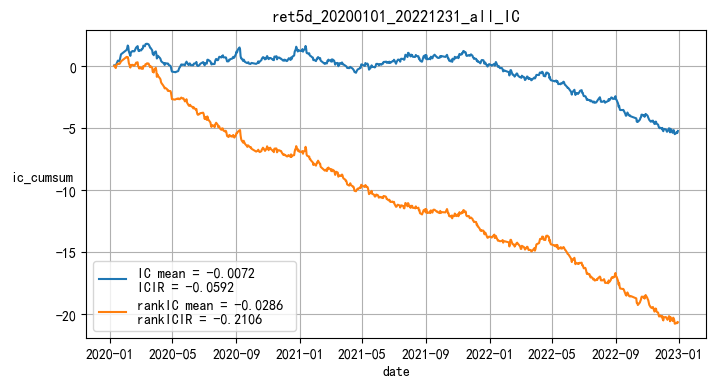

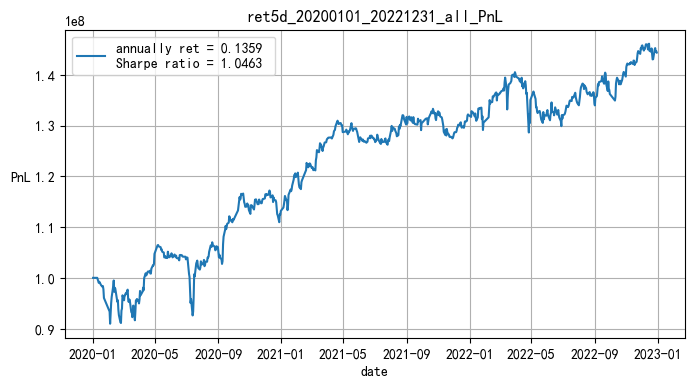

In [7]:
backtest.backtest(alpha, 'ret5d')

,ret5d
IC均值,-0.0015
ICIR,-0.0131
rankIC均值,-0.0263
rankICIR,-0.2101
年化收益率,0.1311
年化波动率,0.0978
夏普比率,1.3405
胜率,0.5067


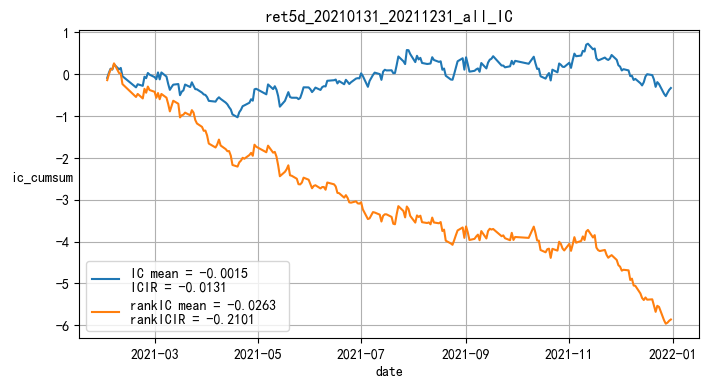

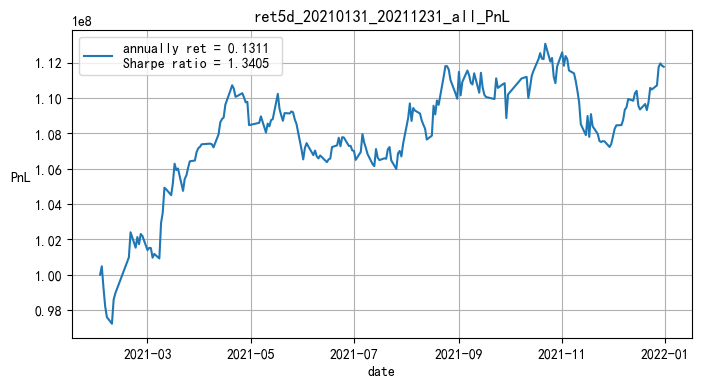

In [8]:
backtest.backtest(alpha, 'ret5d', '20210131', '20211231', output = ['ic', 'pnl', 'metrics'])

In [9]:
alphapool = AlphaPool(PATH, '20200101', '20221231')

In [10]:
alphapool.add(alpha, 'ret5d')

In [11]:
vol = zscore(-np.log(data['volume']))
vol

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-2.382271,-2.041372,1.288465,-0.165892,-0.314874,0.677573,-1.227948,-2.755546,0.643262,0.712702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-2.170598,-1.902916,1.460046,-0.025719,-0.604902,0.705407,-1.121137,-2.550266,1.137786,0.791566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-1.804945,-1.818709,1.234283,0.006087,-0.113987,0.596592,-1.073930,-2.119423,1.091687,0.813999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-1.738873,-1.549181,1.317414,-0.437734,-0.001344,0.676642,-1.058055,-2.828939,0.123346,0.679337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-1.793519,-1.410705,1.467145,-0.736590,-0.108428,0.653642,-1.128831,-2.644404,0.876414,0.758391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-2.131966,-1.900125,1.342239,0.048280,-2.591099,-0.117005,-0.632586,-1.219025,-0.346687,-0.706580,...,1.739698,1.616064,2.060875,1.135873,0.872403,0.831240,1.119786,0.533937,-0.416477,0.353870
2022-12-27,-2.136865,-1.669080,1.019401,-0.430319,-2.866867,-0.248709,-0.630188,-1.370485,-0.287843,-0.992656,...,1.524367,1.757514,2.526105,1.190676,1.092759,0.724914,1.173034,0.704779,-0.234470,0.472174
2022-12-28,-2.055016,-1.571514,1.326627,-0.164371,-2.903261,0.061561,-0.618784,-1.102240,-0.189668,-0.958104,...,1.767612,1.651676,2.256971,1.389403,1.290221,1.128000,1.239215,0.810822,-0.420670,0.584528


,vol
IC均值,0.0145
ICIR,0.1398
rankIC均值,0.0319
rankICIR,0.2730
年化收益率,0.1127
年化波动率,0.0493
夏普比率,2.2865
胜率,0.6016


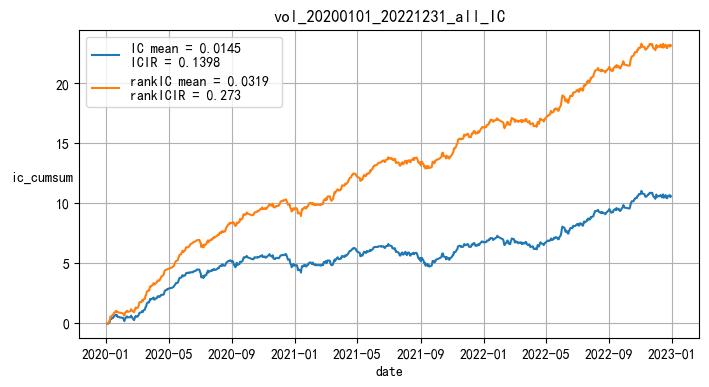

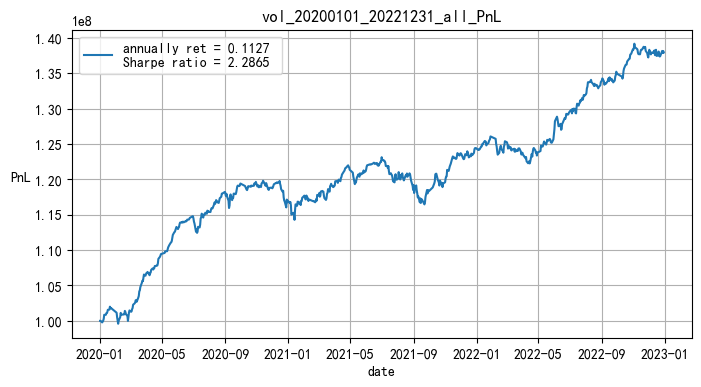

In [12]:
backtest.backtest(vol, 'vol')

,IC均值,ICIR,rankIC均值,rankICIR,年化收益率,年化波动率,夏普比率,胜率,相关系数
vol,0.0145,0.1398,0.0319,0.2730,0.1127,0.0493,2.2865,0.6016,1.000000
ret5d,-0.0072,-0.0592,-0.0286,-0.2106,0.1359,0.1299,1.0463,0.5192,-0.165884


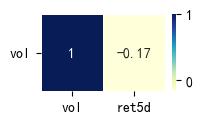

In [13]:
alphapool.eval(vol, 'vol', sort_index = '夏普比率')

In [14]:
alphapool_from_file = AlphaPool(PATH, '20200101', '20221231')
alphapool_from_file.add_from_path()
alphapool_from_file.alpha_list

{'ret5d': {'alpha':             000001.SZ  000002.SZ  000004.SZ  000005.SZ  000006.SZ  000007.SZ  \
  date                                                                           
  2020-01-02        NaN        NaN        NaN        NaN        NaN        NaN   
  2020-01-03        NaN        NaN        NaN        NaN        NaN        NaN   
  2020-01-06        NaN        NaN        NaN        NaN        NaN        NaN   
  2020-01-07        NaN        NaN        NaN        NaN        NaN        NaN   
  2020-01-08        NaN        NaN        NaN        NaN        NaN        NaN   
  ...               ...        ...        ...        ...        ...        ...   
  2022-12-26  -0.026802  -0.030884  -0.037058  -0.004833   0.060062  -0.016442   
  2022-12-27  -0.020492  -0.051167   0.009809   0.022193  -0.017409   0.010701   
  2022-12-28   0.027606  -0.010471   0.027709   0.032704   0.182090   0.005610   
  2022-12-29   0.019706  -0.006155   0.028138   0.022291   0.200511  -0.026401  